# Polynomial regression using sklearn

Here the goal is to learn how to perform simple linear regressions on multivariate data using the `sklearn` package.

One example can be found [here](http://stackoverflow.com/questions/20463226/how-to-do-gaussian-polynomial-regression-with-scikit-learn).

In [1]:
%pylab inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Let's see if I can understand this code snippet

#X is the independent variable (bivariate in this case)
X = array([[0.44, 0.68], [0.99, 0.23]])

#vector is the dependent data
vector = [109.85, 155.72]

#predict is an independent variable for which we'd like to predict the value
predict= [0.49, 0.18]

#generate a model of polynomial features
poly = PolynomialFeatures(degree=2)

#transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_ = poly.fit_transform(X)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(predict)

#generate the regression object
clf = linear_model.LinearRegression()
#preform the actual regression
clf.fit(X_, vector)

print("X_ = ",X_)
print("predict_ = ",predict_)
print("Prediction = ",clf.predict(predict_))

X_ =  [[ 1.      0.44    0.68    0.1936  0.2992  0.4624]
 [ 1.      0.99    0.23    0.9801  0.2277  0.0529]]
predict_ =  [[ 1.      0.49    0.18    0.2401  0.0882  0.0324]]
Prediction =  [ 126.84247142]


In [3]:
def poly2dmax(coefs):
    '''
    Takes coefs from sklearn linear regression and returns max of 2D polynomial
    
    we assume the coefficients are returned as 1, x, y, x^2, xy, y^2
    
    https://en.wikipedia.org/wiki/Quadratic_function
    
    '''
    
    A = coefs[3]
    B = coefs[5]
    C = coefs[1]
    D = coefs[2]
    E = coefs[4]
    F = coefs[0]
    
    x0 = -(2*B*C-D*E)/(4*A*B-E**2)
    y0 = -(2*A*D-C*E)/(4*A*B-E**2)
    
    return array([x0,y0])
    

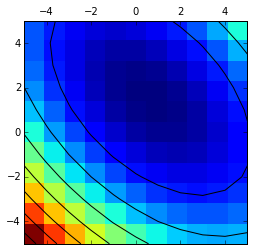

In [4]:
#let's generate a 2D parabola add noise and fit it

x = arange(-5,6)
y = x

xx, yy = meshgrid(x,y)

yyd = yy-2
xxd = xx-1

par = xxd**2+yyd**2+xxd+yyd+xxd*yyd

matshow(par,extent=(-5,5,-5,5),origin='lower')
contour(par,colors='k',extent=(-5,5,-5,5))

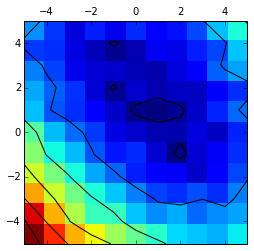

In [5]:
par_n = par + 3*randn(*par.shape)
matshow(par_n,extent=(-5,5,-5,5),origin='lower')
contour(par_n,colors='k',extent=(-5,5,-5,5))

center =  [ 0.56449953  1.83208367]
R^2 =  0.982667521609
[ 0.         -2.93215944 -4.03175282  1.03845667  0.96051444  0.95234266]


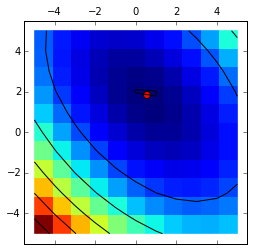

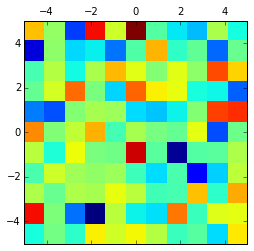

In [11]:
#We have to take our 2D data and transform it into a list of 2D coordinates
X = dstack((xx.ravel(),yy.ravel())).reshape((prod(par.shape),2))

#We have to ravel our data so that it is a list of points
vector = par_n.ravel()

#now we can continue as before
predict= X
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)
clf = linear_model.LinearRegression()
clf.fit(X_, vector)

#we have to reshape our fit to mirror our original data
fit_par_n = clf.predict(predict_).reshape(par.shape)

#find the center
center = poly2dmax(clf.coef_)
print('center = ',center)

#display fit and fit center
matshow(fit_par_n,extent=(-5,5,-5,5),origin='lower')
contour(fit_par_n,colors='k',extent=(-5,5,-5,5))
scatter(*center,s = 50,c = 'r')

#display residuals
matshow(par_n - fit_par_n,extent=(-5,5,-5,5),origin='lower')

#print R^2 and coefs
print('R^2 = ',clf.score(X_,vector))
print(clf.coef_)

center =  [-1.85595764  3.05269688]
R**2 =  0.815900584568
[ 0.         -2.93215944 -4.03175282  0.96051444  0.95234266]


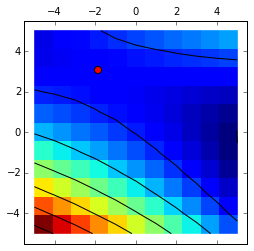

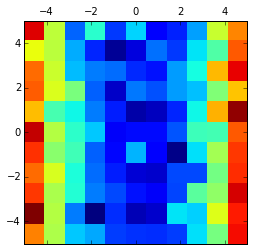

In [7]:
#Here's an example of removing one of the features, in this case x^2
#start as above
X = dstack((xx.ravel(),yy.ravel())).reshape((prod(par.shape),2))
vector = par_n.ravel()
predict= X
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

#remove the x**2 component from the feature set
X_ = delete(X_,(3),axis=1)
predict_ = delete(predict_,(3),axis=1)

#continue as before...
clf = linear_model.LinearRegression()
clf.fit(X_, vector)

fit_par_n = clf.predict(predict_).reshape(par.shape)

#when finding the center we have to add a 0 for that coefficient
center = poly2dmax(insert(clf.coef_,(3),0))

#continue as before...
matshow(fit_par_n,extent=(-5,5,-5,5),origin='lower')
contour(fit_par_n,colors='k',extent=(-5,5,-5,5))
scatter(*center,s = 50,c = 'r')

print('center = ',center)

matshow(par_n - fit_par_n,extent=(-5,5,-5,5),origin='lower')

print('R**2 = ',clf.score(X_,vector))
print(clf.coef_)

#Note that all the residual error is along the x direction, as expected.

In [8]:
#Answer for stackexchange question.

#X is the independent variable (bivariate in this case)
X = array([[0.44, 0.68], [0.99, 0.23]])

#vector is the dependent data
vector = [109.85, 155.72]

#predict is an independent variable for which we'd like to predict the value
predict= [0.49, 0.18]

#generate a model of polynomial features
poly = PolynomialFeatures(degree=2)

#transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_ = poly.fit_transform(X)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(predict)

X_ = delete(X_,(0),axis=1)
predict_ = delete(predict_,(0),axis=1)

#generate the regression object
clf = linear_model.LinearRegression()

#preform the actual regression
clf.fit(X_, vector)

print("X_ = ",X_)
print("predict_ = ",predict_)
print("Prediction = ",clf.predict(predict_))

X_ =  [[ 0.44    0.68    0.1936  0.2992  0.4624]
 [ 0.99    0.23    0.9801  0.2277  0.0529]]
predict_ =  [[ 0.49    0.18    0.2401  0.0882  0.0324]]
Prediction =  [ 126.84247142]
